<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 30** | - Agrupamento hierárquico
Caderno de **exercício**<br>

# Tarefa 2

## Discente: Samuel Saturno



Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

## Importando as Bibliotecas 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from gower import gower_matrix

from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

## Importando o Dataframe 

In [2]:
# Carregando o Dataframe
df = pd.read_csv('online_shoppers_intention.csv')

# Exibir o Dataframe
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [11]:
# Utilizando o método value_counts() do pandas em um DataFrame df
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

## Análise estatísitico com as variáveis numéricos 

In [30]:
# Estatísticas descritivas das variáveis numéricas
num_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Criar Dataframe com as variáveis numéricas 
num_df = df[num_vars]

print(df[num_vars].describe())

# Utilizando o método info() em um DataFrame df
print(df[num_vars].info())

# Verificar se há valores ausentes
missing_values = df[num_vars].isnull().sum()
print("Valores Ausentes:\n", missing_values)

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

## Visualização dos gráficos das variáveis numéricas  

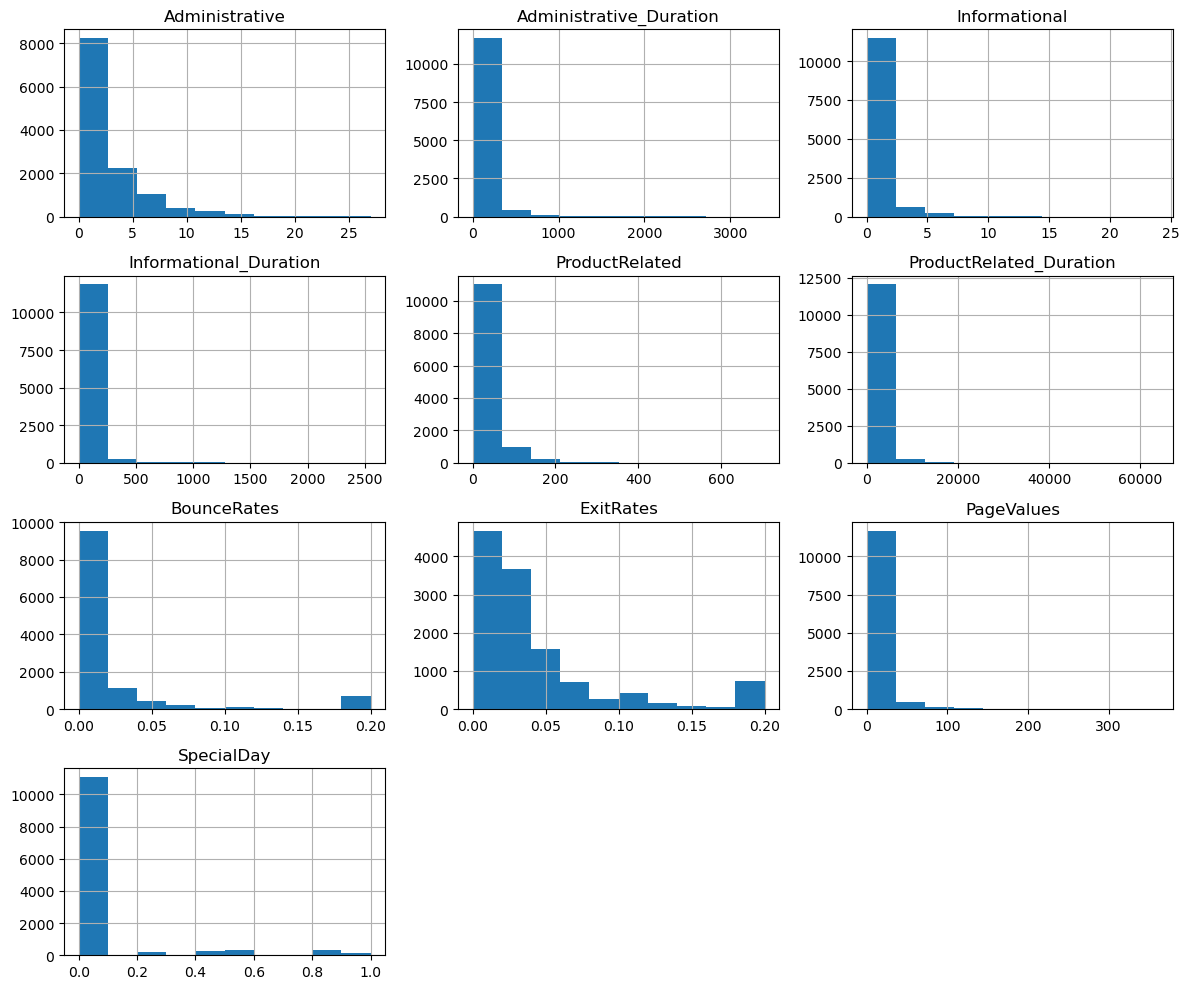

In [4]:
# Histogramas das variáveis numéricas
df[num_vars].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

## Análise estatísitico com as variáveis categóricos 

In [24]:
# Identificar e separar as variáveis categóricas
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
categorical_df = df[categorical_cols]


# Utilizando o método info() para veificar informações do do Dataframe 'categorical_col'
print(df[categorical_cols].info())

# Verificar a distribuição das variáveis categóricas
for col in categorical_cols:
    print(f"Distribuição de {col}:")
    print(categorical_df[col].value_counts())
    print("\n")

# Verificar valores missing
missing_values = categorical_df.isnull().sum()
print("Valores faltantes por coluna:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             12330 non-null  object
 1   OperatingSystems  12330 non-null  int64 
 2   Browser           12330 non-null  int64 
 3   Region            12330 non-null  int64 
 4   TrafficType       12330 non-null  int64 
 5   VisitorType       12330 non-null  object
 6   Weekend           12330 non-null  bool  
 7   Revenue           12330 non-null  bool  
dtypes: bool(2), int64(4), object(2)
memory usage: 602.2+ KB
None
Distribuição de Month:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


Distribuição de OperatingSystems:
OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64


Distribuição de Brow

## Visualização dos gráficos das variáveis categóricas 

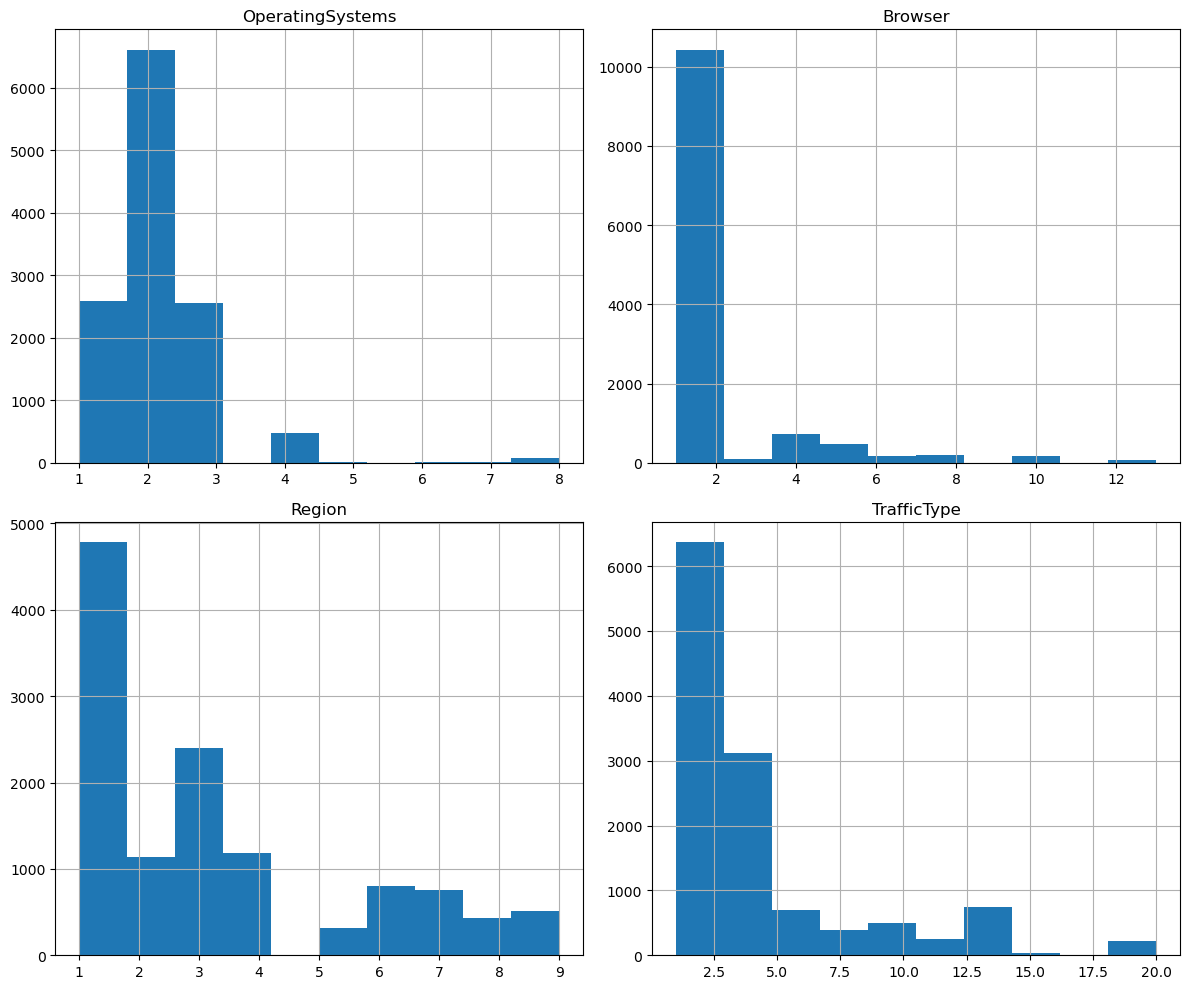

In [28]:
# Histogramas das variáveis categóricas 
df[categorical_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [33]:
# selecionando todas as colunas que não são do tipo numérico.
df.select_dtypes(exclude="number")

,Month,VisitorType,Weekend,Revenue
0,Feb,Returning_Visitor,False,False
1,Feb,Returning_Visitor,False,False
2,Feb,Returning_Visitor,False,False
3,Feb,Returning_Visitor,False,False
4,Feb,Returning_Visitor,True,False
...,...,...,...,...
12325,Dec,Returning_Visitor,True,False
12326,Nov,Returning_Visitor,True,False
12327,Nov,Returning_Visitor,True,False
12328,Nov,Returning_Visitor,False,False


In [37]:
# Cconverte variáveis categóricas em variáveis dummy
# df = Dataframe original; df_1 = Dataframe com variáveis dummy
df_1 = pd.get_dummies(df)
df_1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [36]:
# As variáveis indicam o padrão de navegação na sessão 
# df_2 = Dataframe contendo padrões de navegação 
df_2 = df[["BounceRates", "ExitRates", "PageValues", "TrafficType", "VisitorType", "Revenue"]]
df_2.head()

,BounceRates,ExitRates,PageValues,TrafficType,VisitorType,Revenue
0,0.20,0.20,0.0,1,Returning_Visitor,False
1,0.00,0.10,0.0,2,Returning_Visitor,False
2,0.20,0.20,0.0,3,Returning_Visitor,False
3,0.05,0.14,0.0,4,Returning_Visitor,False
4,0.02,0.05,0.0,4,Returning_Visitor,False


In [38]:
# Variáveis que indicam a caracterísca da data
# df_3 = Dataframe contendo datas de acesso 
df_3 = df[["SpecialDay", "Month", "Weekend"]]
df_3.head()

,SpecialDay,Month,Weekend
0,0.0,Feb,False
1,0.0,Feb,False
2,0.0,Feb,False
3,0.0,Feb,False
4,0.0,Feb,True


## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [40]:
# Cria o Dataframe 'df_col_dum' uma cópia das variáveis com dummy de df_1
df_col_dum = df_1.copy()

# Seleciona as colunas de interesse para a análise 
colunas = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'SpecialDay', 'Month_Aug', 'Month_Dec', 'Month_Feb','Month_Jul', 'Month_June', 'Month_Mar', 'Month_May','Month_Nov','Month_Oct','Month_Sep']

# Seleciona apenas as colunas de interesse no novo dataframe df_col_dum
df_col_dum = df_col_dum[colunas]

In [45]:
# Cria um objeto StandardScaler
#  pré-processamento que padroniza as features removendo a média e escalando para a unidade de variância.
scaler = StandardScaler()

# Aplica o StandardScaler ao dataframe 'df_col_dum'
df_pad = scaler.fit_transform(df_col_dum)

# Exibir os dados padronizados 
df_pad

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.56679818,
        -0.21587139, -0.19417541],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.56679818,
        -0.21587139, -0.19417541],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.56679818,
        -0.21587139, -0.19417541],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  1.76429641,
        -0.21587139, -0.19417541],
       [ 0.50722805, -0.03291592, -0.3964779 , ...,  1.76429641,
        -0.21587139, -0.19417541],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  1.76429641,
        -0.21587139, -0.19417541]])

In [49]:
# Criar 03 clusters
clust_3 = AgglomerativeClustering(n_clusters=3, linkage='average')

# Criar 04 clusters
clust_4 = AgglomerativeClustering(n_clusters=4, linkage='average')

# Aplicar o modelo de clustering com 03 clusters aos dados padronizados
resultados_3 = clust_3.fit(df_pad)
print(resultados_3)

# Aplicar o modelo de clustering com 04 clusters aos dados padronizados
resultados_4 = clust_4.fit(df_pad)
print(resultados_4)

AgglomerativeClustering(linkage='average', n_clusters=3)
AgglomerativeClustering(linkage='average', n_clusters=4)


In [55]:
# Definir as colunas categóricas de interesse
col_2 = {'SpecialDay', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov','Month_Oct', 'Month_Sep'}

# Verificar se cada variável é uma coluna categórica de interesse
vars_cat = [True if x in col_2 else False for x in df_1]

# Calcular a matriz de distância de Gower usando as variáveis categóricas selecionadas
distancia_gower = gower_matrix(df_1, cat_features=vars_cat)

# Converter a matriz de distância de Gower em um vetor
gdv = squareform(distancia_gower, force='tovector')


In [54]:
# Calcular o linkage usando a matriz de distância gdv 'd_gdv' e o método 'average'
d_gdv = linkage(gdv, method='average')

# Criar um DataFrame a partir do resultado do linkage
df_gdv = pd.DataFrame(d_gdv, columns=['id1', 'id2', 'dist', 'n'])

# Exibir as primeiras linhas do DataFrame df_gdv
df_gdv.head()

,id1,id2,dist,n
0,85.0,158.0,0.0,2.0
1,132.0,159.0,0.0,2.0
2,178.0,12331.0,0.0,3.0
3,383.0,1560.0,0.0,2.0
4,1059.0,1697.0,0.0,2.0


Leaves = 7232


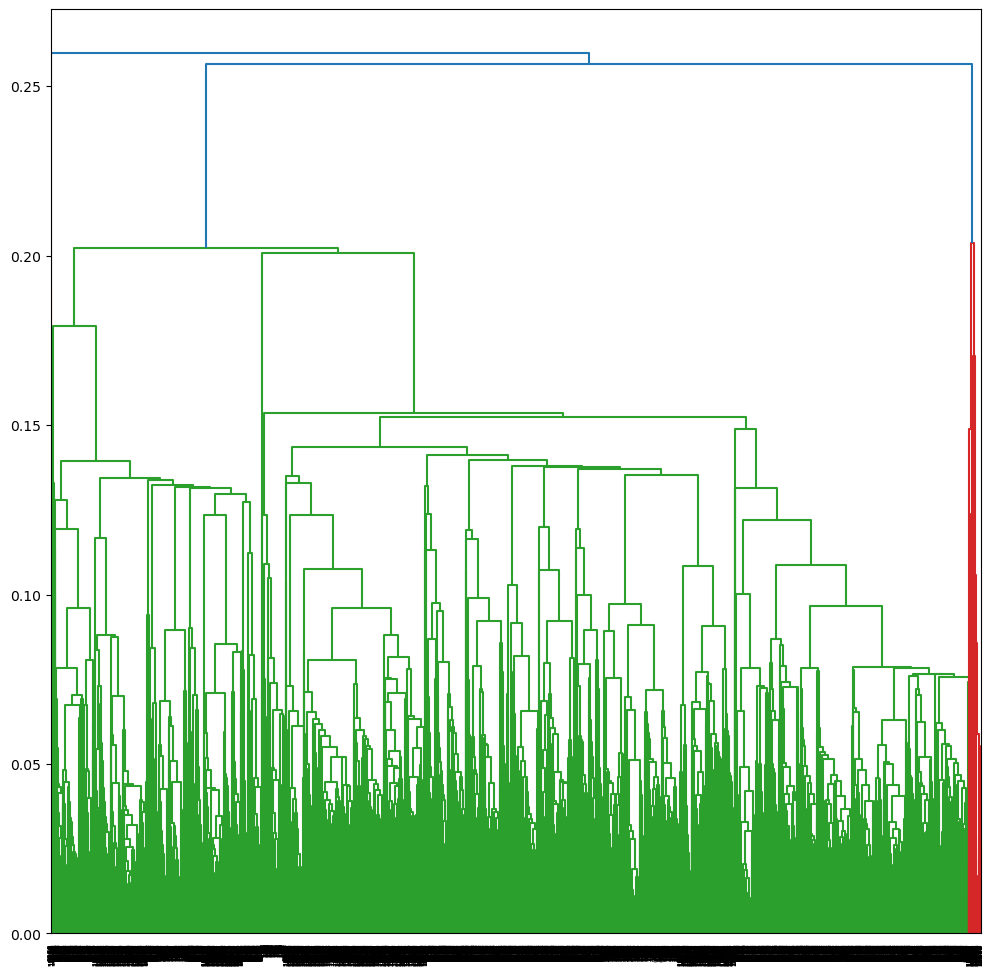

In [56]:
# Criar uma figura e eixos para o dendrograma
fig, axs = plt.subplots(1, 1, figsize=(12, 12))

# Gerar o dendrograma com parâmetros específicos
dn = dendrogram(d_gdv, truncate_mode='level', p=30, show_leaf_counts=True, ax=axs, color_threshold=.24)

# Imprimir o número de folhas (leaves) no dendrograma
print(f"Leaves = {len(dn['leaves'])}")


## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [59]:
# Adicionar uma nova coluna 'grupo_c3' ao DataFrame df_col_dum com os clusters resultantes de 3 grupos
df_col_dum['grupo_c3'] = fcluster(d_gdv, 3, criterion='maxclust')

# Contar a quantidade de observações em cada grupo após a clusterização
df_col_dum.grupo_c3.value_counts()


grupo_c3
2    12234
3       93
1        3
Name: count, dtype: int64

In [60]:
# Adicionar uma nova coluna 'grupo_c4' ao DataFrame df_col_dum com os clusters resultantes de 4 grupos
df_col_dum['grupo_c4'] = fcluster(d_gdv, 4, criterion='maxclust')

# Contar a quantidade de observações em cada grupo após a clusterização
df_col_dum.grupo_c4.value_counts()


grupo_c4
2    12234
4       59
3       34
1        3
Name: count, dtype: int64

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [61]:
df_col_dum.groupby("grupo_c3").mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,grupo_c4
grupo_c3,,,,,,,,,,,,,,,,,,
1,12.333333,2895.107341,14.333333,2182.991667,499.000000,45705.073860,0.000000,0.000000,0.666667,0.00000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,1.000000
2,2.319765,80.292438,0.502616,34.125832,31.768024,1188.812262,0.061909,0.035393,0.135279,0.01504,0.035311,0.023459,0.155877,0.274890,0.243256,0.044875,0.036619,2.000000
3,1.387097,59.252240,0.182796,10.755556,11.849462,539.531774,0.000000,0.000000,0.752688,0.00000,0.000000,0.010753,0.000000,0.000000,0.236559,0.000000,0.000000,3.634409


In [62]:
df_col_dum.groupby("grupo_c4").mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,grupo_c3
grupo_c4,,,,,,,,,,,,,,,,,,
1,12.333333,2895.107341,14.333333,2182.991667,499.000000,45705.073860,0.000000,0.000000,0.666667,0.00000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,1.0
2,2.319765,80.292438,0.502616,34.125832,31.768024,1188.812262,0.061909,0.035393,0.135279,0.01504,0.035311,0.023459,0.155877,0.274890,0.243256,0.044875,0.036619,2.0
3,0.676471,30.257353,0.088235,20.955882,6.264706,231.105771,0.000000,0.000000,0.441176,0.00000,0.000000,0.000000,0.000000,0.000000,0.558824,0.000000,0.000000,3.0
4,1.796610,75.961158,0.237288,4.877401,15.067797,717.268792,0.000000,0.000000,0.932203,0.00000,0.000000,0.016949,0.000000,0.000000,0.050847,0.000000,0.000000,3.0


### Insight: 

Para determinar qual grupo possui clientes mais propensos à compra, podemos analisar as características dos grupos em relação às variáveis que podem influenciar essa propensão. As variáveis que podem indicar essa propensão incluem "Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration" e possivelmente "SpecialDay" (indicando se a compra ocorreu em um dia especial).

Grupo 1 (grupo_c3=1, grupo_c4=1):

* Possui uma quantidade significativa de atividades administrativas e relacionadas a produtos, com tempos de duração 
* relativamente longos.
* Apresenta baixa atividade informativa.
* Não parece ser afetado por dias especiais.

Grupo 2 (grupo_c3=2, grupo_c4=2):

* Possui atividades administrativas, informativas e relacionadas a produtos, mas em uma escala menor em comparação com o Grupo 1.
* Os tempos de duração das atividades são mais curtos em média.
* Mostra alguma atividade em dias especiais.

Grupo 3 (grupo_c3=3, grupo_c4=3):

* Apresenta baixa atividade administrativa, informativa e relacionada a produtos.
* Tempos de duração das atividades são mais curtos em média.
* A atividade em dias especiais é menor em comparação com os outros grupos.

Grupo 4 (grupo_c4=4):

* Similar ao Grupo 3 em termos de atividade administrativa, informativa e relacionada a produtos, porém um pouco mais ativo nessas áreas.
* Os tempos de duração das atividades são intermediários.
* Também mostra alguma atividade em dias especiais.

Portanto, com base nessas observações, o Grupo 1 (grupo_c3=1, grupo_c4=1) parece ser o mais propenso à compra, seguido pelo Grupo 4 (grupo_c4=4). 